## Demo: On Using Quasirandom Sequences in Machine Learning for Model Weight Initialization

The following demo shows training, evaluation, and analysis of a Multi-Layer Perceptron (MLP) on the MNIST dataset, a Convolutional Neural Network (CNN) on the CIFAR-10 dataset, and an LSTM model on the IMDB dataset. The demo is based on the "On Using Quasirandom Sequences in Machine Learning for Model Weight Initialization" paper. The demo is divided into the following sections:

1. MNIST dataset and MLP model
2. CIFAR-10 dataset and CNN model
3. IMDB dataset and LSTM model
4. Analysis: Quasi-random vs. pseudo-random initialization

The goal of this demo is to serve as an entry point for users and to facilitate reproducibility.

Other setups can also be explored. Here are some examples of parameter values (not all combinations will work):
* `dataset_id` is either  `mnist`, `cifar10`, or `imdb_reviews`;
* `kernel_initializer` is either `glorot-normal`, `glorot-uniform`, `he-normal`, `he-uniform`, `lecun-normal`, `lecun-uniform`, `orthogonal`, `random-normal`, `random-uniform`, or `truncated-normal`;
* `initializer_type` is either `quasi-random` or `pseudo-random`;
* `model_id` is either `baseline-ann`, `baseline-cnn`, `baseline-lstm`, or `baseline-transformer`;
* `optimizer` is etier `adam` or `sgd` (the deafult one is `adam`).

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
tf.get_logger().setLevel('FATAL')

In [3]:
from train_and_eval import run_experiment # See src/train_and_eval.py pydoc for more info
from utils import plot_demo
EPOCHS = 10
SEQUENCE_SCHEME="auto"
AUTO_MIN_SEED_VALUE=1
AUTO_MAX_SEED_VALUE=10
AUTO_EPOCH_COUNT=1
AUTO_SEEDS_COUNT=5
NUM_REPS=2

### MNIST MLP -- Image Classification

In [22]:
mlp_quasi_stats = [run_experiment(
    experiment_id=1,
    sequence_scheme=SEQUENCE_SCHEME,
    units=32,
    dataset_id="mnist",
    kernel_initializer="lecun-uniform",
    initializer_type="quasi-random",
    model_id="baseline-ann",
    epochs=EPOCHS,
    auto_epoch_count=AUTO_EPOCH_COUNT,
    auto_min_seed_value=AUTO_MIN_SEED_VALUE,
    auto_max_seed_value=AUTO_MAX_SEED_VALUE,
    auto_seeds_count=AUTO_SEEDS_COUNT,
)[0] for _ in range(NUM_REPS)]

INFO:datapipeline:Loading MNIST dataset with flatten=True and one_hot=True
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:Flattening images
INFO:datapipeline:MNIST Dataset loaded
INFO:datapipeline:x_train shape (60000, 784)
INFO:datapipeline:y_train shape (60000, 10)
INFO:datapipeline:x_test shape (10000, 784)
INFO:datapipeline:y_test shape (10000, 10)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 60000
INFO:utils:x_train shape before splitting (60000, 784)
INFO:utils:y_train shape before splitting (60000, 10)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (60000, 784)
INFO:utils:y_train shape after splitting (60000, 10)
INFO:utils:x_val shape after splitting (0, 784)
INFO:utils:y_val shape after splitting (0, 10)
INFO:train_and_eval:Choosing the best seed from this set: [1, 3, 6, 7, 10]
INFO:models:Initialized

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3661 - loss: 159.6252

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.6355999708175659, time per epoch = 2.94 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.3663 - loss: 159.5036


INFO:models:Initialized ModelBuilder with model_id=baseline-ann, input_shape=[784], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-uniform', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-uniform from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunUniformQR to 3.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 4.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 5.


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4586 - loss: 2.9722

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7742000222206116, time per epoch = 2.88 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.4588 - loss: 2.9707


INFO:models:Initialized ModelBuilder with model_id=baseline-ann, input_shape=[784], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-uniform', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-uniform from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunUniformQR to 6.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 7.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 8.


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.5305 - loss: 2.0230

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.8489999771118164, time per epoch = 2.64 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.5307 - loss: 2.0220


INFO:models:Initialized ModelBuilder with model_id=baseline-ann, input_shape=[784], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-uniform', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-uniform from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunUniformQR to 7.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 8.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 9.


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.1489 - loss: 5.9471

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.3666999936103821, time per epoch = 2.65 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.1490 - loss: 5.9440


INFO:models:Initialized ModelBuilder with model_id=baseline-ann, input_shape=[784], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-uniform', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-uniform from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunUniformQR to 10.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 11.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 12.


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3692 - loss: 4.5230

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7355999946594238, time per epoch = 2.69 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.3694 - loss: 4.5205


INFO:train_and_eval:Resetting the state. Starting QRNG dimension is now set to 6.
INFO:train_and_eval:Running experiment #1
INFO:models:Initialized ModelBuilder with model_id=baseline-ann, input_shape=[784], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-uniform', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-uniform from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunUniformQR to 6.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 7.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 8.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.5244 - loss: 2.0534

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.8503999710083008, time per epoch = 2.69 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.5246 - loss: 2.0525
Epoch 2/10
906/938 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.8651 - loss: 0.4735

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.8973000049591064, time per epoch = 1.38 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8655 - loss: 0.4721
Epoch 3/10
905/938 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.9001 - loss: 0.3507

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.9061999917030334, time per epoch = 1.37 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9001 - loss: 0.3505
Epoch 4/10
909/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9149 - loss: 0.3008

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.9164000153541565, time per epoch = 1.43 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9149 - loss: 0.3007
Epoch 5/10
935/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9245 - loss: 0.2628

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.9172000288963318, time per epoch = 1.49 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9245 - loss: 0.2628
Epoch 6/10
934/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9326 - loss: 0.2354

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.9265999794006348, time per epoch = 1.44 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9326 - loss: 0.2354
Epoch 7/10
929/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9368 - loss: 0.2133

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.9293000102043152, time per epoch = 1.50 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9368 - loss: 0.2133
Epoch 8/10
922/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9422 - loss: 0.1952

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.9315000176429749, time per epoch = 1.51 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9422 - loss: 0.1952
Epoch 9/10
916/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9463 - loss: 0.1811

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.9334999918937683, time per epoch = 1.52 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9463 - loss: 0.1810
Epoch 10/10
914/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9493 - loss: 0.1713

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.9368000030517578, time per epoch = 1.62 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9493 - loss: 0.1712


INFO:datapipeline:Loading MNIST dataset with flatten=True and one_hot=True
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:Flattening images
INFO:datapipeline:MNIST Dataset loaded
INFO:datapipeline:x_train shape (60000, 784)
INFO:datapipeline:y_train shape (60000, 10)
INFO:datapipeline:x_test shape (10000, 784)
INFO:datapipeline:y_test shape (10000, 10)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 60000
INFO:utils:x_train shape before splitting (60000, 784)
INFO:utils:y_train shape before splitting (60000, 10)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (60000, 784)
INFO:utils:y_train shape after splitting (60000, 10)
INFO:utils:x_val shape after splitting (0, 784)
INFO:utils:y_val shape after splitting (0, 10)
INFO:train_and_eval:Choosing the best seed from this set: [1, 3, 4, 5, 6]
INFO:models:Initialized 

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3670 - loss: 159.7609

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.6686000227928162, time per epoch = 2.95 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.3671 - loss: 159.6391


INFO:models:Initialized ModelBuilder with model_id=baseline-ann, input_shape=[784], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-uniform', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-uniform from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunUniformQR to 3.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 4.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 5.


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4559 - loss: 3.0272

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7724999785423279, time per epoch = 2.95 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.4560 - loss: 3.0258


INFO:models:Initialized ModelBuilder with model_id=baseline-ann, input_shape=[784], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-uniform', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-uniform from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunUniformQR to 4.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 5.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 6.


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3493 - loss: 3.8615

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7049999833106995, time per epoch = 2.93 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.3495 - loss: 3.8596


INFO:models:Initialized ModelBuilder with model_id=baseline-ann, input_shape=[784], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-uniform', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-uniform from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunUniformQR to 5.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 6.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 7.


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3601 - loss: 6.9961

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7387999892234802, time per epoch = 2.97 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.3603 - loss: 6.9918


INFO:models:Initialized ModelBuilder with model_id=baseline-ann, input_shape=[784], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-uniform', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-uniform from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunUniformQR to 6.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 7.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 8.


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.5205 - loss: 2.0558

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.839900016784668, time per epoch = 2.96 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.5207 - loss: 2.0548


INFO:train_and_eval:Resetting the state. Starting QRNG dimension is now set to 6.
INFO:train_and_eval:Running experiment #1
INFO:models:Initialized ModelBuilder with model_id=baseline-ann, input_shape=[784], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-uniform', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-uniform from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunUniformQR to 6.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 7.
INFO:custom_initializers:Setting seed value for LecunUniformQR to 8.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.5287 - loss: 2.0603

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.8482000231742859, time per epoch = 2.88 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.5289 - loss: 2.0593
Epoch 2/10
931/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8648 - loss: 0.4823

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.8873999714851379, time per epoch = 1.50 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8649 - loss: 0.4820
Epoch 3/10
929/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8992 - loss: 0.3562

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.9070000052452087, time per epoch = 1.50 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8993 - loss: 0.3561
Epoch 4/10
925/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9149 - loss: 0.3059

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.9168999791145325, time per epoch = 1.50 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9149 - loss: 0.3057
Epoch 5/10
910/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9237 - loss: 0.2691

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.9199000000953674, time per epoch = 1.52 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9238 - loss: 0.2689
Epoch 6/10
930/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9303 - loss: 0.2421

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.9204000234603882, time per epoch = 1.49 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9304 - loss: 0.2420
Epoch 7/10
928/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9365 - loss: 0.2183

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.9240999817848206, time per epoch = 1.51 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9365 - loss: 0.2182
Epoch 8/10
923/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9421 - loss: 0.2022

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.9236999750137329, time per epoch = 1.51 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9422 - loss: 0.2021
Epoch 9/10
913/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9456 - loss: 0.1862

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.9340999722480774, time per epoch = 1.52 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9456 - loss: 0.1861
Epoch 10/10
918/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9493 - loss: 0.1728

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.939300000667572, time per epoch = 1.51 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9493 - loss: 0.1727


In [23]:
mlp_pseudo_stats = [run_experiment(
    experiment_id=1,
    sequence_scheme=SEQUENCE_SCHEME,
    units=64,
    dataset_id="mnist",
    kernel_initializer="lecun-uniform",
    initializer_type="pseudo-random",
    model_id="baseline-ann",
    epochs=EPOCHS,
    auto_epoch_count=AUTO_EPOCH_COUNT,
    auto_min_seed_value=AUTO_MIN_SEED_VALUE,
    auto_max_seed_value=AUTO_MAX_SEED_VALUE,
    auto_seeds_count=AUTO_SEEDS_COUNT,
)[0] for _ in range(NUM_REPS)]

INFO:datapipeline:Loading MNIST dataset with flatten=True and one_hot=True
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:Flattening images
INFO:datapipeline:MNIST Dataset loaded
INFO:datapipeline:x_train shape (60000, 784)
INFO:datapipeline:y_train shape (60000, 10)
INFO:datapipeline:x_test shape (10000, 784)
INFO:datapipeline:y_test shape (10000, 10)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 60000
INFO:utils:x_train shape before splitting (60000, 784)
INFO:utils:y_train shape before splitting (60000, 10)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (60000, 784)
INFO:utils:y_train shape after splitting (60000, 10)
INFO:utils:x_val shape after splitting (0, 784)
INFO:utils:y_val shape after splitting (0, 10)
INFO:train_and_eval:Seeds for this experiment will be selected at random. Setting sequence_scheme 

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.5503 - loss: 9.9638

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.8030999898910522, time per epoch = 2.87 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.5504 - loss: 9.9577
Epoch 2/10
911/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8207 - loss: 1.0386

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.8568000197410583, time per epoch = 1.53 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8210 - loss: 1.0345
Epoch 3/10
929/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8687 - loss: 0.6326

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.8865000009536743, time per epoch = 1.55 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8687 - loss: 0.6320
Epoch 4/10
924/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8974 - loss: 0.4568

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.900600016117096, time per epoch = 1.51 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8975 - loss: 0.4562
Epoch 5/10
932/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9153 - loss: 0.3558

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.9081000089645386, time per epoch = 1.54 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9153 - loss: 0.3556
Epoch 6/10
935/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9278 - loss: 0.2873

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.9169999957084656, time per epoch = 1.54 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9278 - loss: 0.2872
Epoch 7/10
912/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9384 - loss: 0.2422

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.9229999780654907, time per epoch = 1.52 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9384 - loss: 0.2419
Epoch 8/10
926/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9454 - loss: 0.2036

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.926800012588501, time per epoch = 1.50 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9454 - loss: 0.2035
Epoch 9/10
930/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9510 - loss: 0.1775

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.9316999912261963, time per epoch = 1.49 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9511 - loss: 0.1774
Epoch 10/10
919/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9570 - loss: 0.1556

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.9337000250816345, time per epoch = 1.51 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9570 - loss: 0.1555


INFO:datapipeline:Loading MNIST dataset with flatten=True and one_hot=True
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:Flattening images
INFO:datapipeline:MNIST Dataset loaded
INFO:datapipeline:x_train shape (60000, 784)
INFO:datapipeline:y_train shape (60000, 10)
INFO:datapipeline:x_test shape (10000, 784)
INFO:datapipeline:y_test shape (10000, 10)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 60000
INFO:utils:x_train shape before splitting (60000, 784)
INFO:utils:y_train shape before splitting (60000, 10)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (60000, 784)
INFO:utils:y_train shape after splitting (60000, 10)
INFO:utils:x_val shape after splitting (0, 784)
INFO:utils:y_val shape after splitting (0, 10)
INFO:train_and_eval:Seeds for this experiment will be selected at random. Setting sequence_scheme 

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.5728 - loss: 10.9389

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.8392000198364258, time per epoch = 2.93 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.5729 - loss: 10.9326
Epoch 2/10
920/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8568 - loss: 1.4420

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.8783000111579895, time per epoch = 1.51 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8570 - loss: 1.4379
Epoch 3/10
931/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8890 - loss: 0.8454

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.8986999988555908, time per epoch = 1.49 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8891 - loss: 0.8447
Epoch 4/10
922/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9092 - loss: 0.5857

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.9110999703407288, time per epoch = 1.50 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9093 - loss: 0.5848
Epoch 5/10
918/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9232 - loss: 0.4307

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.9157999753952026, time per epoch = 1.51 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9232 - loss: 0.4301
Epoch 6/10
919/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9336 - loss: 0.3386

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.9197999835014343, time per epoch = 1.51 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9337 - loss: 0.3381
Epoch 7/10
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9435 - loss: 0.2665

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.9273999929428101, time per epoch = 1.54 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9435 - loss: 0.2664
Epoch 8/10
922/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9507 - loss: 0.2159

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.9294999837875366, time per epoch = 1.51 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9507 - loss: 0.2158
Epoch 9/10
922/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9558 - loss: 0.1801

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.9312999844551086, time per epoch = 1.50 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9559 - loss: 0.1799
Epoch 10/10
921/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9630 - loss: 0.1516

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.934499979019165, time per epoch = 1.51 seconds


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.9630 - loss: 0.1515


### CIFAR-10 CNN -- Image Classification

In [7]:
cnn_quasi_stats = [run_experiment(
    experiment_id=1,
    sequence_scheme=SEQUENCE_SCHEME,
    units=32,
    dataset_id="cifar10",
    kernel_initializer="lecun-normal",
    initializer_type="quasi-random",
    model_id="baseline-cnn",
    epochs=EPOCHS,
    auto_epoch_count=AUTO_EPOCH_COUNT,
    auto_min_seed_value=AUTO_MIN_SEED_VALUE,
    auto_max_seed_value=AUTO_MAX_SEED_VALUE,
    auto_seeds_count=AUTO_SEEDS_COUNT,
)[0] for _ in range(NUM_REPS)]

INFO:datapipeline:Loading CIFAR10 dataset with flatten=False and one_hot=True


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:CIFAR10 Dataset loaded
INFO:datapipeline:x_train shape (50000, 32, 32, 3)
INFO:datapipeline:y_train shape (50000, 10)
INFO:datapipeline:x_test shape (10000, 32, 32, 3)
INFO:datapipeline:y_test shape (10000, 10)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 50000
INFO:utils:x_train shape before splitting (50000, 32, 32, 3)
INFO:utils:y_train shape before splitting (50000, 10)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (50000, 32, 32, 3)
INFO:utils:y_train shape after splitting (50000, 10)
INFO:utils:x_val shape after splitting (0, 32, 32, 3)
INFO:utils:y_val shape after splitting (0, 10)
INFO:train_and_eval:Choosing the best seed from this set: [1, 3, 7, 8, 9]
INFO:models:Initialized ModelBuilder with model_id=baseline-cnn, input_shape=[32, 32, 3], output_shape=

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.1028 - loss: 12.1827

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.10010000318288803, time per epoch = 5.90 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - categorical_accuracy: 0.1028 - loss: 12.1727


INFO:models:Initialized ModelBuilder with model_id=baseline-cnn, input_shape=[32, 32, 3], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-normal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunNormalQR to 3.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 4.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 5.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 6.


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2296 - loss: 2.1595

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.40369999408721924, time per epoch = 4.60 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.2297 - loss: 2.1591


INFO:models:Initialized ModelBuilder with model_id=baseline-cnn, input_shape=[32, 32, 3], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-normal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunNormalQR to 7.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 8.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 9.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 10.


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2410 - loss: 2.1669

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.39800000190734863, time per epoch = 4.93 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.2411 - loss: 2.1666


INFO:models:Initialized ModelBuilder with model_id=baseline-cnn, input_shape=[32, 32, 3], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-normal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunNormalQR to 8.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 9.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 10.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 11.


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2042 - loss: 2.6556

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.37279999256134033, time per epoch = 4.58 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.2043 - loss: 2.6548


INFO:models:Initialized ModelBuilder with model_id=baseline-cnn, input_shape=[32, 32, 3], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-normal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunNormalQR to 9.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 10.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 11.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 12.


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2021 - loss: 2.2574

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.37959998846054077, time per epoch = 4.57 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.2022 - loss: 2.2571


INFO:train_and_eval:Resetting the state. Starting QRNG dimension is now set to 3.
INFO:train_and_eval:Running experiment #1
INFO:models:Initialized ModelBuilder with model_id=baseline-cnn, input_shape=[32, 32, 3], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-normal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunNormalQR to 3.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 4.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 5.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 6.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,570 (260.04 KB)

 Trainable params: 66,570 (260.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2447 - loss: 2.1290

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.414900004863739, time per epoch = 4.59 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.2448 - loss: 2.1287
Epoch 2/10
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4295 - loss: 1.5890

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.47589999437332153, time per epoch = 2.47 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.4297 - loss: 1.5886
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4817 - loss: 1.4507

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.5027999877929688, time per epoch = 2.61 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.4817 - loss: 1.4506
Epoch 4/10
767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5190 - loss: 1.3544

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.521399974822998, time per epoch = 2.54 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.5192 - loss: 1.3541
Epoch 5/10
763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5512 - loss: 1.2782

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.5371999740600586, time per epoch = 2.27 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.5513 - loss: 1.2779
Epoch 6/10
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5711 - loss: 1.2203

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.5559999942779541, time per epoch = 2.37 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.5711 - loss: 1.2202
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5927 - loss: 1.1689

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.5491999983787537, time per epoch = 2.33 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.5927 - loss: 1.1689
Epoch 8/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.6109 - loss: 1.1241

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.5788999795913696, time per epoch = 2.33 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.6110 - loss: 1.1241
Epoch 9/10
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.6244 - loss: 1.0849

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.5767999887466431, time per epoch = 2.24 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.6244 - loss: 1.0849
Epoch 10/10
765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.6390 - loss: 1.0488

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.5792999863624573, time per epoch = 2.21 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.6391 - loss: 1.0485


INFO:datapipeline:Loading CIFAR10 dataset with flatten=False and one_hot=True
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:CIFAR10 Dataset loaded
INFO:datapipeline:x_train shape (50000, 32, 32, 3)
INFO:datapipeline:y_train shape (50000, 10)
INFO:datapipeline:x_test shape (10000, 32, 32, 3)
INFO:datapipeline:y_test shape (10000, 10)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 50000
INFO:utils:x_train shape before splitting (50000, 32, 32, 3)
INFO:utils:y_train shape before splitting (50000, 10)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (50000, 32, 32, 3)
INFO:utils:y_train shape after splitting (50000, 10)
INFO:utils:x_val shape after splitting (0, 32, 32, 3)
INFO:utils:y_val shape after splitting (0, 10)
INFO:train_and_eval:Choosing the best seed from this set: [1, 7, 8, 9, 10]
INFO:models:Initialized 

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.1002 - loss: 12.2325

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.10000000149011612, time per epoch = 4.30 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.1002 - loss: 12.2224


INFO:models:Initialized ModelBuilder with model_id=baseline-cnn, input_shape=[32, 32, 3], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-normal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunNormalQR to 7.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 8.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 9.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 10.


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2487 - loss: 2.1513

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.4036000072956085, time per epoch = 4.72 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.2488 - loss: 2.1510


INFO:models:Initialized ModelBuilder with model_id=baseline-cnn, input_shape=[32, 32, 3], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-normal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunNormalQR to 8.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 9.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 10.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 11.


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2060 - loss: 2.6196

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.3716000020503998, time per epoch = 4.48 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.2061 - loss: 2.6189


INFO:models:Initialized ModelBuilder with model_id=baseline-cnn, input_shape=[32, 32, 3], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-normal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunNormalQR to 9.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 10.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 11.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 12.


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2062 - loss: 2.2557

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.37709999084472656, time per epoch = 4.31 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.2062 - loss: 2.2553


INFO:models:Initialized ModelBuilder with model_id=baseline-cnn, input_shape=[32, 32, 3], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-normal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunNormalQR to 10.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 11.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 12.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 13.


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.1552 - loss: 2.4460

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.32659998536109924, time per epoch = 4.16 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.1553 - loss: 2.4456


INFO:train_and_eval:Resetting the state. Starting QRNG dimension is now set to 7.
INFO:train_and_eval:Running experiment #1
INFO:models:Initialized ModelBuilder with model_id=baseline-cnn, input_shape=[32, 32, 3], output_shape=10, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'lecun-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': None, 'units': 32, 'embedding_dim': None}
INFO:trainer:Initializing lecun-normal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:custom_initializers:Setting seed value for LecunNormalQR to 7.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 8.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 9.
INFO:custom_initializers:Setting seed value for LecunNormalQR to 10.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,570 (260.04 KB)

 Trainable params: 66,570 (260.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.2511 - loss: 2.1533

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.40369999408721924, time per epoch = 4.15 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.2512 - loss: 2.1530
Epoch 2/10
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4239 - loss: 1.6049

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.4392000138759613, time per epoch = 2.51 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.4240 - loss: 1.6046
Epoch 3/10
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4797 - loss: 1.4572

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.4869000017642975, time per epoch = 2.23 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.4797 - loss: 1.4570
Epoch 4/10
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5147 - loss: 1.3656

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.5178999900817871, time per epoch = 2.04 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.5147 - loss: 1.3655
Epoch 5/10
766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5447 - loss: 1.2901

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.5256999731063843, time per epoch = 2.11 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.5447 - loss: 1.2901
Epoch 6/10
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5652 - loss: 1.2286

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.5472000241279602, time per epoch = 2.21 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.5652 - loss: 1.2285
Epoch 7/10
769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5843 - loss: 1.1848

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.5485000014305115, time per epoch = 2.43 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.5844 - loss: 1.1847
Epoch 8/10
769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5985 - loss: 1.1371

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.5698999762535095, time per epoch = 2.27 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.5986 - loss: 1.1370
Epoch 9/10
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.6149 - loss: 1.0928

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.5631999969482422, time per epoch = 2.16 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.6149 - loss: 1.0928
Epoch 10/10
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.6266 - loss: 1.0554

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.5802000164985657, time per epoch = 2.23 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.6266 - loss: 1.0554


In [8]:
cnn_pseudo_stats = [run_experiment(
    experiment_id=1,
    sequence_scheme=SEQUENCE_SCHEME,
    units=32,
    dataset_id="cifar10",
    kernel_initializer="lecun-normal",
    initializer_type="pseudo-random",
    model_id="baseline-cnn",
    epochs=EPOCHS,
    auto_epoch_count=AUTO_EPOCH_COUNT,
    auto_min_seed_value=AUTO_MIN_SEED_VALUE,
    auto_max_seed_value=AUTO_MAX_SEED_VALUE,
    auto_seeds_count=AUTO_SEEDS_COUNT,
)[0] for _ in range(NUM_REPS)]

INFO:datapipeline:Loading CIFAR10 dataset with flatten=False and one_hot=True
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:CIFAR10 Dataset loaded
INFO:datapipeline:x_train shape (50000, 32, 32, 3)
INFO:datapipeline:y_train shape (50000, 10)
INFO:datapipeline:x_test shape (10000, 32, 32, 3)
INFO:datapipeline:y_test shape (10000, 10)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 50000
INFO:utils:x_train shape before splitting (50000, 32, 32, 3)
INFO:utils:y_train shape before splitting (50000, 10)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (50000, 32, 32, 3)
INFO:utils:y_train shape after splitting (50000, 10)
INFO:utils:x_val shape after splitting (0, 32, 32, 3)
INFO:utils:y_val shape after splitting (0, 10)
INFO:train_and_eval:Seeds for this experiment will be selected at random. Setting sequence_scheme t

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,570 (260.04 KB)

 Trainable params: 66,570 (260.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.1793 - loss: 10.4306

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.20600000023841858, time per epoch = 4.74 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.1794 - loss: 10.4243
Epoch 2/10
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.2347 - loss: 2.1219

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.29409998655319214, time per epoch = 2.62 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.2349 - loss: 2.1213
Epoch 3/10
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.3180 - loss: 1.8866

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.35920000076293945, time per epoch = 2.33 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.3181 - loss: 1.8865
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.3776 - loss: 1.7171

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.4124999940395355, time per epoch = 2.27 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.3776 - loss: 1.7170
Epoch 5/10
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4298 - loss: 1.5717

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.4357999861240387, time per epoch = 2.23 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.4299 - loss: 1.5716
Epoch 6/10
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4657 - loss: 1.4847

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.4650999903678894, time per epoch = 2.28 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.4657 - loss: 1.4846
Epoch 7/10
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4891 - loss: 1.4103

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.4855000078678131, time per epoch = 2.30 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.4892 - loss: 1.4102
Epoch 8/10
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5136 - loss: 1.3511

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.5037000179290771, time per epoch = 2.33 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.5136 - loss: 1.3511
Epoch 9/10
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5328 - loss: 1.3001

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.5160999894142151, time per epoch = 2.31 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.5328 - loss: 1.3001
Epoch 10/10
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5487 - loss: 1.2599

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.5218999981880188, time per epoch = 2.33 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.5487 - loss: 1.2599


INFO:datapipeline:Loading CIFAR10 dataset with flatten=False and one_hot=True
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:CIFAR10 Dataset loaded
INFO:datapipeline:x_train shape (50000, 32, 32, 3)
INFO:datapipeline:y_train shape (50000, 10)
INFO:datapipeline:x_test shape (10000, 32, 32, 3)
INFO:datapipeline:y_test shape (10000, 10)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 50000
INFO:utils:x_train shape before splitting (50000, 32, 32, 3)
INFO:utils:y_train shape before splitting (50000, 10)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (50000, 32, 32, 3)
INFO:utils:y_train shape after splitting (50000, 10)
INFO:utils:x_val shape after splitting (0, 32, 32, 3)
INFO:utils:y_val shape after splitting (0, 10)
INFO:train_and_eval:Seeds for this experiment will be selected at random. Setting sequence_scheme t

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,570 (260.04 KB)

 Trainable params: 66,570 (260.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.1779 - loss: 16.2245

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.16419999301433563, time per epoch = 4.83 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.1779 - loss: 16.2131
Epoch 2/10
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.1963 - loss: 2.2182

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.24770000576972961, time per epoch = 2.45 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.1964 - loss: 2.2179
Epoch 3/10
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.2622 - loss: 2.0130

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.290800005197525, time per epoch = 2.45 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.2622 - loss: 2.0128
Epoch 4/10
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.3122 - loss: 1.8555

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.3610000014305115, time per epoch = 2.51 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.3123 - loss: 1.8550
Epoch 5/10
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.3702 - loss: 1.7060

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.4059000015258789, time per epoch = 2.53 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.3703 - loss: 1.7059
Epoch 6/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4215 - loss: 1.5885

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.4352000057697296, time per epoch = 2.27 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.4215 - loss: 1.5885
Epoch 7/10
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4511 - loss: 1.5053

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.46480000019073486, time per epoch = 2.28 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.4511 - loss: 1.5053
Epoch 8/10
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4776 - loss: 1.4301

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.4717999994754791, time per epoch = 2.42 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.4777 - loss: 1.4299
Epoch 9/10
766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5040 - loss: 1.3664

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.5041000247001648, time per epoch = 2.25 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.5041 - loss: 1.3664
Epoch 10/10
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5211 - loss: 1.3211

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.515500009059906, time per epoch = 2.17 seconds


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.5211 - loss: 1.3211


### IMDB LSTM -- Text Classification

In [26]:
lstm_quasi_stats = [run_experiment(
    experiment_id=1,
    sequence_scheme=SEQUENCE_SCHEME,
    dataset_id="imdb_reviews",
    kernel_initializer="random-normal",
    initializer_type="quasi-random",
    model_id="baseline-lstm",
    units=64,
    embedding_dim=32,
    max_features=20000,
    epochs=EPOCHS,
    auto_epoch_count=AUTO_EPOCH_COUNT,
    auto_min_seed_value=AUTO_MIN_SEED_VALUE,
    auto_max_seed_value=AUTO_MAX_SEED_VALUE,
    auto_seeds_count=AUTO_SEEDS_COUNT,
)[0] for _ in range(5)]

INFO:datapipeline:Loading IMDB reviews dataset
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:IMDB reviews dataset loaded
INFO:datapipeline:x_train shape (25000, 512)
INFO:datapipeline:y_train shape (25000, 2)
INFO:datapipeline:x_test shape (25000, 512)
INFO:datapipeline:y_test shape (25000, 2)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 25000
INFO:utils:x_train shape before splitting (25000, 512)
INFO:utils:y_train shape before splitting (25000, 2)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (25000, 512)
INFO:utils:y_train shape after splitting (25000, 2)
INFO:utils:x_val shape after splitting (0, 512)
INFO:utils:y_val shape after splitting (0, 2)
INFO:train_and_eval:Choosing the best seed from this set: [1, 2, 3, 6, 8]
INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], o

390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.5568 - loss: 0.6803

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7870399951934814, time per epoch = 15.23 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - categorical_accuracy: 0.5573 - loss: 0.6801


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 2.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 2.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 3.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.5662 - loss: 0.6735

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.785319983959198, time per epoch = 17.23 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - categorical_accuracy: 0.5665 - loss: 0.6733


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 3.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 3.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 4.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.5299 - loss: 0.6899

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.730679988861084, time per epoch = 16.28 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - categorical_accuracy: 0.5301 - loss: 0.6898


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 6.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 6.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 7.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.5443 - loss: 0.6842

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7694799900054932, time per epoch = 15.91 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - categorical_accuracy: 0.5445 - loss: 0.6841


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 8.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 8.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 9.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.5302 - loss: 0.6834

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7825199961662292, time per epoch = 15.97 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - categorical_accuracy: 0.5304 - loss: 0.6833


INFO:train_and_eval:Resetting the state. Starting QRNG dimension is now set to 1.
INFO:train_and_eval:Running experiment #1
INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 1.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 1.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 2.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 512, 32)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 664,962 (2.54 MB)

 Trainable params: 664,962 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.5881 - loss: 0.6731

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7676399946212769, time per epoch = 15.40 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - categorical_accuracy: 0.5886 - loss: 0.6729
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.8186 - loss: 0.4363

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.8496000170707703, time per epoch = 14.60 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - categorical_accuracy: 0.8186 - loss: 0.4362
Epoch 3/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.8857 - loss: 0.2906

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.8633599877357483, time per epoch = 17.30 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - categorical_accuracy: 0.8858 - loss: 0.2905
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.9185 - loss: 0.2281

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.8738800287246704, time per epoch = 14.82 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - categorical_accuracy: 0.9185 - loss: 0.2280
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.9349 - loss: 0.1868

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.875760018825531, time per epoch = 14.10 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - categorical_accuracy: 0.9349 - loss: 0.1867
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.9494 - loss: 0.1542

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.8752400279045105, time per epoch = 13.77 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - categorical_accuracy: 0.9494 - loss: 0.1541
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.9602 - loss: 0.1288

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.861840009689331, time per epoch = 15.98 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - categorical_accuracy: 0.9602 - loss: 0.1288
Epoch 8/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.9660 - loss: 0.1116

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.866919994354248, time per epoch = 15.21 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - categorical_accuracy: 0.9660 - loss: 0.1116
Epoch 9/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.9741 - loss: 0.0900

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.8654400110244751, time per epoch = 15.30 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - categorical_accuracy: 0.9741 - loss: 0.0899
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.9804 - loss: 0.0762

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.8505600094795227, time per epoch = 14.39 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - categorical_accuracy: 0.9804 - loss: 0.0762


INFO:datapipeline:Loading IMDB reviews dataset
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:IMDB reviews dataset loaded
INFO:datapipeline:x_train shape (25000, 512)
INFO:datapipeline:y_train shape (25000, 2)
INFO:datapipeline:x_test shape (25000, 512)
INFO:datapipeline:y_test shape (25000, 2)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 25000
INFO:utils:x_train shape before splitting (25000, 512)
INFO:utils:y_train shape before splitting (25000, 2)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (25000, 512)
INFO:utils:y_train shape after splitting (25000, 2)
INFO:utils:x_val shape after splitting (0, 512)
INFO:utils:y_val shape after splitting (0, 2)
INFO:train_and_eval:Choosing the best seed from this set: [2, 4, 7, 8, 10]
INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], 

391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.5870 - loss: 0.6673

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7717199921607971, time per epoch = 16.65 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - categorical_accuracy: 0.5872 - loss: 0.6671


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 4.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 4.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 5.


390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.5444 - loss: 0.6849

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7742800116539001, time per epoch = 14.24 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - categorical_accuracy: 0.5448 - loss: 0.6848


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 7.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 7.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 8.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.5358 - loss: 0.6845

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7792400121688843, time per epoch = 16.19 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - categorical_accuracy: 0.5360 - loss: 0.6844


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 8.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 8.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 9.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.5485 - loss: 0.6769

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.8080800175666809, time per epoch = 16.57 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - categorical_accuracy: 0.5487 - loss: 0.6768


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 10.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 10.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 11.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.5876 - loss: 0.6732

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.8024799823760986, time per epoch = 16.68 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - categorical_accuracy: 0.5878 - loss: 0.6730


INFO:train_and_eval:Resetting the state. Starting QRNG dimension is now set to 8.
INFO:train_and_eval:Running experiment #1
INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 8.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 8.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 9.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 512, 32)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 664,962 (2.54 MB)

 Trainable params: 664,962 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.5647 - loss: 0.6795

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7866399884223938, time per epoch = 15.35 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - categorical_accuracy: 0.5649 - loss: 0.6794
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.8150 - loss: 0.4585

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.8529599905014038, time per epoch = 12.97 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - categorical_accuracy: 0.8151 - loss: 0.4584
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.8798 - loss: 0.3037

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.859279990196228, time per epoch = 15.06 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - categorical_accuracy: 0.8799 - loss: 0.3036
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.9160 - loss: 0.2294

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.8805599808692932, time per epoch = 16.29 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - categorical_accuracy: 0.9160 - loss: 0.2294
Epoch 5/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.9362 - loss: 0.1791

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.8784800171852112, time per epoch = 15.36 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - categorical_accuracy: 0.9362 - loss: 0.1790
Epoch 6/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.9511 - loss: 0.1491

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.8775200247764587, time per epoch = 13.77 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - categorical_accuracy: 0.9512 - loss: 0.1491
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.9596 - loss: 0.1236

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.875760018825531, time per epoch = 15.50 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - categorical_accuracy: 0.9596 - loss: 0.1236
Epoch 8/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.9702 - loss: 0.1004

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.8708400130271912, time per epoch = 15.16 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - categorical_accuracy: 0.9702 - loss: 0.1004
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.9768 - loss: 0.0826

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.8666399717330933, time per epoch = 14.15 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - categorical_accuracy: 0.9768 - loss: 0.0826
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.9804 - loss: 0.0709

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.8650400042533875, time per epoch = 13.09 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - categorical_accuracy: 0.9804 - loss: 0.0708


INFO:datapipeline:Loading IMDB reviews dataset
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:IMDB reviews dataset loaded
INFO:datapipeline:x_train shape (25000, 512)
INFO:datapipeline:y_train shape (25000, 2)
INFO:datapipeline:x_test shape (25000, 512)
INFO:datapipeline:y_test shape (25000, 2)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 25000
INFO:utils:x_train shape before splitting (25000, 512)
INFO:utils:y_train shape before splitting (25000, 2)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (25000, 512)
INFO:utils:y_train shape after splitting (25000, 2)
INFO:utils:x_val shape after splitting (0, 512)
INFO:utils:y_val shape after splitting (0, 2)
INFO:train_and_eval:Choosing the best seed from this set: [3, 5, 6, 8, 10]
INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], 

390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.5757 - loss: 0.6739

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.766759991645813, time per epoch = 15.81 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - categorical_accuracy: 0.5762 - loss: 0.6736


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 5.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 5.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 6.


390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.5557 - loss: 0.6765

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7776399850845337, time per epoch = 16.69 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - categorical_accuracy: 0.5561 - loss: 0.6762


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 6.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 6.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 7.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.5559 - loss: 0.6780

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.72843998670578, time per epoch = 16.15 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - categorical_accuracy: 0.5561 - loss: 0.6779


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 8.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 8.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 9.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.5358 - loss: 0.6842

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7721199989318848, time per epoch = 15.43 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - categorical_accuracy: 0.5360 - loss: 0.6841


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 10.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 10.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 11.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.5516 - loss: 0.6786

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7706000208854675, time per epoch = 14.60 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - categorical_accuracy: 0.5518 - loss: 0.6785


INFO:train_and_eval:Resetting the state. Starting QRNG dimension is now set to 5.
INFO:train_and_eval:Running experiment #1
INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 5.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 5.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 6.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 512, 32)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 664,962 (2.54 MB)

 Trainable params: 664,962 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.5438 - loss: 0.6791

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7996000051498413, time per epoch = 16.20 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - categorical_accuracy: 0.5440 - loss: 0.6790
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.7801 - loss: 0.5336

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.8519200086593628, time per epoch = 16.13 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - categorical_accuracy: 0.7802 - loss: 0.5333
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.8785 - loss: 0.3087

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.869159996509552, time per epoch = 13.49 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - categorical_accuracy: 0.8785 - loss: 0.3087
Epoch 4/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.9111 - loss: 0.2426

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.8730000257492065, time per epoch = 13.81 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - categorical_accuracy: 0.9111 - loss: 0.2425
Epoch 5/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.9292 - loss: 0.2007

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.8723599910736084, time per epoch = 15.09 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - categorical_accuracy: 0.9293 - loss: 0.2006
Epoch 6/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.9461 - loss: 0.1656

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.8746399879455566, time per epoch = 15.49 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - categorical_accuracy: 0.9461 - loss: 0.1656
Epoch 7/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.9567 - loss: 0.1409

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.8698400259017944, time per epoch = 14.68 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - categorical_accuracy: 0.9568 - loss: 0.1408
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.9644 - loss: 0.1185

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.8706799745559692, time per epoch = 13.74 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - categorical_accuracy: 0.9644 - loss: 0.1185
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.9732 - loss: 0.0956

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.8654400110244751, time per epoch = 15.23 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - categorical_accuracy: 0.9732 - loss: 0.0956
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.9770 - loss: 0.0839

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.8655200004577637, time per epoch = 16.39 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - categorical_accuracy: 0.9770 - loss: 0.0839


INFO:datapipeline:Loading IMDB reviews dataset
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:IMDB reviews dataset loaded
INFO:datapipeline:x_train shape (25000, 512)
INFO:datapipeline:y_train shape (25000, 2)
INFO:datapipeline:x_test shape (25000, 512)
INFO:datapipeline:y_test shape (25000, 2)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 25000
INFO:utils:x_train shape before splitting (25000, 512)
INFO:utils:y_train shape before splitting (25000, 2)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (25000, 512)
INFO:utils:y_train shape after splitting (25000, 2)
INFO:utils:x_val shape after splitting (0, 512)
INFO:utils:y_val shape after splitting (0, 2)
INFO:train_and_eval:Choosing the best seed from this set: [1, 3, 6, 7, 9]
INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], o

391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.5606 - loss: 0.6672

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.810479998588562, time per epoch = 15.71 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - categorical_accuracy: 0.5608 - loss: 0.6671


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 3.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 3.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 4.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.5422 - loss: 0.6794

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.795199990272522, time per epoch = 15.97 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - categorical_accuracy: 0.5424 - loss: 0.6793


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 6.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 6.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 7.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.5593 - loss: 0.6833

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7599599957466125, time per epoch = 15.66 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - categorical_accuracy: 0.5595 - loss: 0.6833


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 7.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 7.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 8.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.5444 - loss: 0.6818

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.6361200213432312, time per epoch = 14.70 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - categorical_accuracy: 0.5446 - loss: 0.6817


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 9.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 9.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 10.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.5501 - loss: 0.6791

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7414399981498718, time per epoch = 16.00 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - categorical_accuracy: 0.5503 - loss: 0.6790


INFO:train_and_eval:Resetting the state. Starting QRNG dimension is now set to 1.
INFO:train_and_eval:Running experiment #1
INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 1.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 1.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 2.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 512, 32)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 664,962 (2.54 MB)

 Trainable params: 664,962 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.5495 - loss: 0.6792

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7826799750328064, time per epoch = 16.26 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - categorical_accuracy: 0.5497 - loss: 0.6790
Epoch 2/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.8110 - loss: 0.4716

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.8298400044441223, time per epoch = 13.45 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - categorical_accuracy: 0.8111 - loss: 0.4713
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.8681 - loss: 0.3231

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.8507999777793884, time per epoch = 13.91 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - categorical_accuracy: 0.8682 - loss: 0.3231
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.9069 - loss: 0.2470

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.866159975528717, time per epoch = 15.30 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - categorical_accuracy: 0.9070 - loss: 0.2470
Epoch 5/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.9310 - loss: 0.1917

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.869159996509552, time per epoch = 14.54 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - categorical_accuracy: 0.9311 - loss: 0.1916
Epoch 6/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.9457 - loss: 0.1624

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.8716400265693665, time per epoch = 14.58 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - categorical_accuracy: 0.9457 - loss: 0.1623
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.9558 - loss: 0.1351

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.8650000095367432, time per epoch = 13.80 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - categorical_accuracy: 0.9558 - loss: 0.1350
Epoch 8/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.9651 - loss: 0.1135

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.8657199740409851, time per epoch = 15.08 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - categorical_accuracy: 0.9651 - loss: 0.1135
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.9701 - loss: 0.0967

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.8634799718856812, time per epoch = 14.76 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - categorical_accuracy: 0.9701 - loss: 0.0967
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.9777 - loss: 0.0827

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.8621600270271301, time per epoch = 14.56 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - categorical_accuracy: 0.9777 - loss: 0.0827


INFO:datapipeline:Loading IMDB reviews dataset
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:IMDB reviews dataset loaded
INFO:datapipeline:x_train shape (25000, 512)
INFO:datapipeline:y_train shape (25000, 2)
INFO:datapipeline:x_test shape (25000, 512)
INFO:datapipeline:y_test shape (25000, 2)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 25000
INFO:utils:x_train shape before splitting (25000, 512)
INFO:utils:y_train shape before splitting (25000, 2)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (25000, 512)
INFO:utils:y_train shape after splitting (25000, 2)
INFO:utils:x_val shape after splitting (0, 512)
INFO:utils:y_val shape after splitting (0, 2)
INFO:train_and_eval:Choosing the best seed from this set: [1, 4, 6, 8, 9]
INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], o

391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.5653 - loss: 0.6714

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.776639997959137, time per epoch = 15.34 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - categorical_accuracy: 0.5656 - loss: 0.6712


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 4.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 4.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 5.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.5462 - loss: 0.6831

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7099999785423279, time per epoch = 14.29 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - categorical_accuracy: 0.5464 - loss: 0.6831


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 6.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 6.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 7.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.5698 - loss: 0.6711

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7708399891853333, time per epoch = 17.39 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step - categorical_accuracy: 0.5700 - loss: 0.6709


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 8.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 8.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 9.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.5722 - loss: 0.6726

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7960399985313416, time per epoch = 16.84 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - categorical_accuracy: 0.5724 - loss: 0.6725


INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 9.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 9.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 10.


390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.5510 - loss: 0.6786

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7729600071907043, time per epoch = 15.16 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - categorical_accuracy: 0.5515 - loss: 0.6784


INFO:train_and_eval:Resetting the state. Starting QRNG dimension is now set to 8.
INFO:train_and_eval:Running experiment #1
INFO:models:Initialized ModelBuilder with model_id=baseline-lstm, input_shape=[512], output_shape=2, output_activation=softmax, model_config={'initializer_type': 'quasi-random', 'kernel_initializer': 'random-normal', 'bias_initializer': 'zeros', 'recurrent_initializer': 'orthogonal', 'max_features': 20000, 'units': 64, 'embedding_dim': 32}
INFO:trainer:Initializing random-normal from quasi-random, seed=None
INFO:trainer:Initializing orthogonal from quasi-random, seed=None
INFO:trainer:Initializing zeros from quasi-random, seed=None
INFO:trainer:Initializing random-uniform from pseudo-random, seed=None
INFO:custom_initializers:Setting seed value for RandomNormalQR to 8.
INFO:custom_initializers:Setting seed value for OrthogonalInitializerQR to 8.
INFO:custom_initializers:Setting seed value for RandomNormalQR to 9.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 512, 32)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 664,962 (2.54 MB)

 Trainable params: 664,962 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.5774 - loss: 0.6755

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.774399995803833, time per epoch = 15.05 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - categorical_accuracy: 0.5776 - loss: 0.6754
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.8234 - loss: 0.4302

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.85971999168396, time per epoch = 14.61 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - categorical_accuracy: 0.8235 - loss: 0.4301
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.8897 - loss: 0.2838

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.8683199882507324, time per epoch = 14.12 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - categorical_accuracy: 0.8898 - loss: 0.2837
Epoch 4/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.9204 - loss: 0.2179

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.8766000270843506, time per epoch = 15.05 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - categorical_accuracy: 0.9204 - loss: 0.2178
Epoch 5/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.9360 - loss: 0.1844

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.8731600046157837, time per epoch = 15.73 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - categorical_accuracy: 0.9360 - loss: 0.1844
Epoch 6/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.9526 - loss: 0.1472

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.8762000203132629, time per epoch = 14.58 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - categorical_accuracy: 0.9526 - loss: 0.1471
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.9613 - loss: 0.1181

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.866159975528717, time per epoch = 13.75 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - categorical_accuracy: 0.9613 - loss: 0.1181
Epoch 8/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.9696 - loss: 0.1011

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.8700000047683716, time per epoch = 13.85 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - categorical_accuracy: 0.9696 - loss: 0.1011
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.9774 - loss: 0.0826

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.8640000224113464, time per epoch = 15.93 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - categorical_accuracy: 0.9774 - loss: 0.0826
Epoch 10/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.9806 - loss: 0.0696

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.8642799854278564, time per epoch = 16.21 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - categorical_accuracy: 0.9806 - loss: 0.0696


In [27]:
lstm_pseudo_stats = [run_experiment(
    experiment_id=1,
    sequence_scheme=SEQUENCE_SCHEME,
    dataset_id="imdb_reviews",
    kernel_initializer="random-normal",
    initializer_type="pseudo-random",
    model_id="baseline-lstm",
    units=64,
    embedding_dim=32,
    max_features=20000,
    epochs=EPOCHS,
    auto_epoch_count=AUTO_EPOCH_COUNT,
    auto_min_seed_value=AUTO_MIN_SEED_VALUE,
    auto_max_seed_value=AUTO_MAX_SEED_VALUE,
    auto_seeds_count=AUTO_SEEDS_COUNT,
)[0] for _ in range(NUM_REPS)]


INFO:datapipeline:Loading IMDB reviews dataset
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:IMDB reviews dataset loaded
INFO:datapipeline:x_train shape (25000, 512)
INFO:datapipeline:y_train shape (25000, 2)
INFO:datapipeline:x_test shape (25000, 512)
INFO:datapipeline:y_test shape (25000, 2)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 25000
INFO:utils:x_train shape before splitting (25000, 512)
INFO:utils:y_train shape before splitting (25000, 2)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (25000, 512)
INFO:utils:y_train shape after splitting (25000, 2)
INFO:utils:x_val shape after splitting (0, 512)
INFO:utils:y_val shape after splitting (0, 2)
INFO:train_and_eval:Seeds for this experiment will be selected at random. Setting sequence_scheme to random.
INFO:train_and_eval:Running experiment #1
INFO:mode

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 512, 32)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 664,962 (2.54 MB)

 Trainable params: 664,962 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.5564 - loss: 0.6818

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7573999762535095, time per epoch = 15.42 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - categorical_accuracy: 0.5566 - loss: 0.6817
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.8246 - loss: 0.4240

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.8638799786567688, time per epoch = 13.90 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - categorical_accuracy: 0.8247 - loss: 0.4238
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.8984 - loss: 0.2716

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.8830000162124634, time per epoch = 14.12 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - categorical_accuracy: 0.8984 - loss: 0.2715
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.9212 - loss: 0.2167

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.8805599808692932, time per epoch = 14.51 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - categorical_accuracy: 0.9212 - loss: 0.2167
Epoch 5/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.9356 - loss: 0.1816

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.8837599754333496, time per epoch = 15.78 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - categorical_accuracy: 0.9356 - loss: 0.1815
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.9500 - loss: 0.1478

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.883840024471283, time per epoch = 15.42 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - categorical_accuracy: 0.9500 - loss: 0.1478
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.9598 - loss: 0.1268

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.8774399757385254, time per epoch = 14.17 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - categorical_accuracy: 0.9598 - loss: 0.1268
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.9668 - loss: 0.1092

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.8769599795341492, time per epoch = 12.77 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - categorical_accuracy: 0.9668 - loss: 0.1091
Epoch 9/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.9748 - loss: 0.0864

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.8725200295448303, time per epoch = 14.70 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - categorical_accuracy: 0.9749 - loss: 0.0863
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.9788 - loss: 0.0731

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.871999979019165, time per epoch = 15.25 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - categorical_accuracy: 0.9788 - loss: 0.0731


INFO:datapipeline:Loading IMDB reviews dataset
INFO:datapipeline:Converting labels to one-hot encoding
INFO:datapipeline:IMDB reviews dataset loaded
INFO:datapipeline:x_train shape (25000, 512)
INFO:datapipeline:y_train shape (25000, 2)
INFO:datapipeline:x_test shape (25000, 512)
INFO:datapipeline:y_test shape (25000, 2)
INFO:utils:Splitting Data into Train and Validation
INFO:utils:Training observation count is set to 25000
INFO:utils:x_train shape before splitting (25000, 512)
INFO:utils:y_train shape before splitting (25000, 2)
INFO:utils:Training observation count equals the length of x_train. No validation set will be created.
INFO:utils:x_train shape after splitting (25000, 512)
INFO:utils:y_train shape after splitting (25000, 2)
INFO:utils:x_val shape after splitting (0, 512)
INFO:utils:y_val shape after splitting (0, 2)
INFO:train_and_eval:Seeds for this experiment will be selected at random. Setting sequence_scheme to random.
INFO:train_and_eval:Running experiment #1
INFO:mode

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 512, 32)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 664,962 (2.54 MB)

 Trainable params: 664,962 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.5411 - loss: 0.6829

INFO:trainer:Epoch 1: train accuracy = -1, val accuracy = -1, test accuracy = 0.7546799778938293, time per epoch = 16.47 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - categorical_accuracy: 0.5413 - loss: 0.6828
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.8256 - loss: 0.4129

INFO:trainer:Epoch 2: train accuracy = -1, val accuracy = -1, test accuracy = 0.869920015335083, time per epoch = 14.46 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - categorical_accuracy: 0.8257 - loss: 0.4127
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.8982 - loss: 0.2626

INFO:trainer:Epoch 3: train accuracy = -1, val accuracy = -1, test accuracy = 0.8745599985122681, time per epoch = 13.46 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - categorical_accuracy: 0.8982 - loss: 0.2626
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.9230 - loss: 0.2104

INFO:trainer:Epoch 4: train accuracy = -1, val accuracy = -1, test accuracy = 0.877240002155304, time per epoch = 15.46 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - categorical_accuracy: 0.9230 - loss: 0.2103
Epoch 5/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.9416 - loss: 0.1737

INFO:trainer:Epoch 5: train accuracy = -1, val accuracy = -1, test accuracy = 0.8744400143623352, time per epoch = 16.23 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - categorical_accuracy: 0.9416 - loss: 0.1736
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.9518 - loss: 0.1446

INFO:trainer:Epoch 6: train accuracy = -1, val accuracy = -1, test accuracy = 0.8802000284194946, time per epoch = 14.91 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - categorical_accuracy: 0.9518 - loss: 0.1446
Epoch 7/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.9633 - loss: 0.1200

INFO:trainer:Epoch 7: train accuracy = -1, val accuracy = -1, test accuracy = 0.8701599836349487, time per epoch = 14.05 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - categorical_accuracy: 0.9633 - loss: 0.1200
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.9721 - loss: 0.0986

INFO:trainer:Epoch 8: train accuracy = -1, val accuracy = -1, test accuracy = 0.8737599849700928, time per epoch = 14.84 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - categorical_accuracy: 0.9721 - loss: 0.0986
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.9745 - loss: 0.0858

INFO:trainer:Epoch 9: train accuracy = -1, val accuracy = -1, test accuracy = 0.8637199997901917, time per epoch = 16.26 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - categorical_accuracy: 0.9745 - loss: 0.0858
Epoch 10/10
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.9830 - loss: 0.0655

INFO:trainer:Epoch 10: train accuracy = -1, val accuracy = -1, test accuracy = 0.8668799996376038, time per epoch = 15.83 seconds


391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - categorical_accuracy: 0.9830 - loss: 0.0655


# Analysis: Quasi-random vs. pseudo-random initialization

\* Note: The code in this notebook is a demonstration and does not necessarily reflect the full implementation and results of the paper.

In [28]:
stats = {
    "MLP Pseudo-Random": mlp_pseudo_stats,
    "MLP Quasi-Random": mlp_quasi_stats,
    "CNN Pseudo-Random": cnn_pseudo_stats,
    "CNN Quasi-Random": cnn_quasi_stats,
    "LSTM Pseudo-Random": lstm_pseudo_stats,
    "LSTM Quasi-Random": lstm_quasi_stats,
}


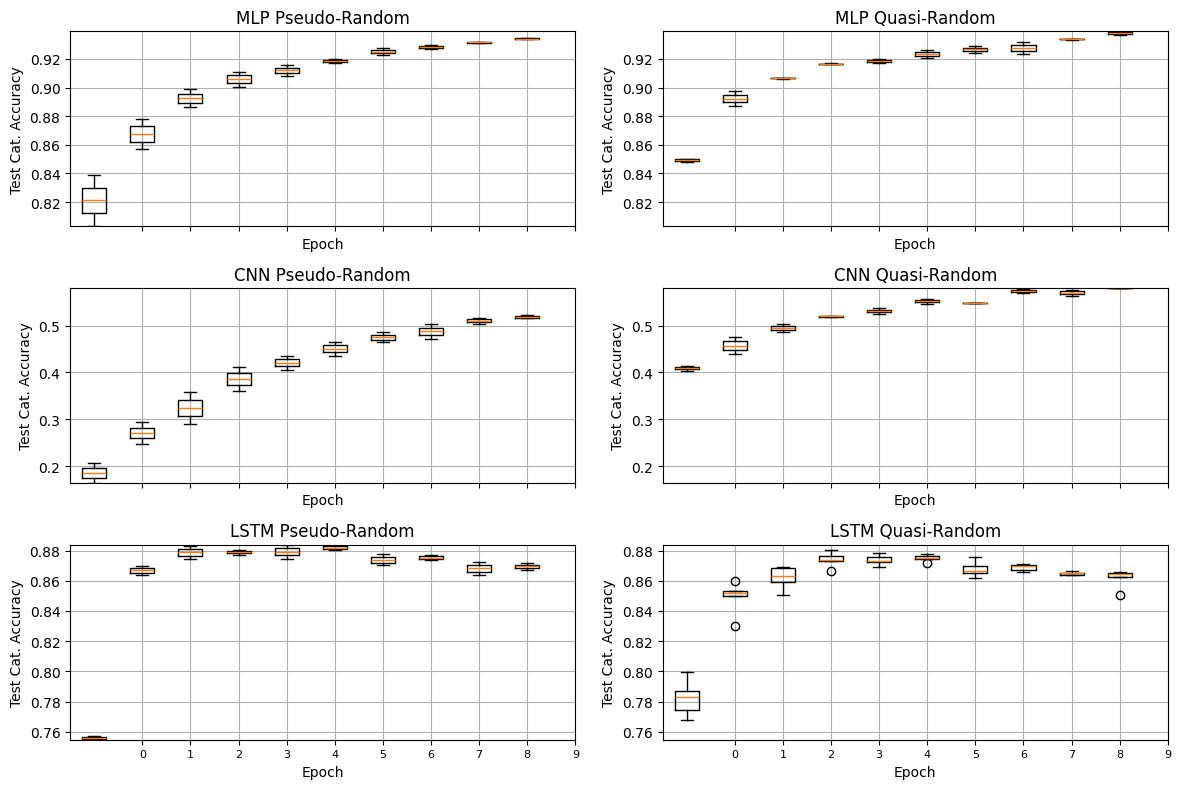

In [29]:
plot_demo(stats, epochs=EPOCHS)